In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Cargamos datos

In [10]:
data = pd.read_csv('dataset_kickstarter_ml.csv', sep=';')

#### Borramos variables que hemos convertido en dummies

In [11]:
del data['exchange_rate']

In [12]:
del data['country']

In [13]:
del data['category']

In [14]:
del data['main_category']

In [15]:
del data['currency']

In [16]:
del data['ID']

In [17]:
del data['backers']

In [18]:
del data['pledged']

In [19]:
del data['deadline']

In [20]:
del data['launched']

## Hacemos una nueva copia del dataset

In [21]:
data_final = data.copy()

## Separamos la variable Target

In [22]:
labels = data_final['Target']

## Eliminamos la variable Target

In [23]:
del data_final['Target']

## Separación del conjunto de test

In [24]:
data_train, data_test, labels_train, labels_test = train_test_split(data_final, labels, test_size=0.20, random_state=42)

data_train_y_val= data_train
data_test= data_test


# Modelo de Clasificación

Modelo Random Forest

In [85]:
# Definimos el modelo Random Forest 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()


In [86]:
# Establecemos los hiperparámetros del modelo
grid_random_forest = {"n_estimators": [100,150], 
                     
                     "max_depth": [5,10,15,20], 
                      
                     "max_features": ["sqrt", 0.4, 10] 
                     }

In [87]:
# Usamos GridSearch para encontrar la mejor combinación de parámetros
gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring="accuracy",
                                verbose=1,
                                refit=True,
                                n_jobs=-1)

In [88]:
gs_random_forest.fit(data_train_y_val, labels_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 148.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 225.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [89]:
gs_random_forest.best_score_

0.7822788874760469

Modelo Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()

In [30]:
grid_gradient_boosting = {"loss": ["deviance"], 
                          
                          "learning_rate": [0.1], 
                          
                          "n_estimators": [150], 
                          
                          "max_depth": [3,5], 
                          
                          "subsample": [ 0.8, 0.5], 
                          
                          "max_features": ["sqrt", 0.4,6]
                          }

In [31]:
gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=-1)

In [32]:
gs_gradient_boosting.fit(data_train_y_val, labels_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 93.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [34]:

gs_gradient_boosting.best_score_

0.7866639873420326

Modelo Xgboost

In [81]:
# Definimos el modelo xgboost

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

xgb_1 = XGBClassifier()


In [82]:
grid_xgboost= {
    "learning rate": [0.1],
         "n_estimators": [150],
        "max_depth": [3,5],
        'min_child_weight':range(1,4,7),
        "gamma": [0, 0.1],
         "subsample": [0.8, 0.3],
        "colsample_bytree":[0.3,0.8]
          
}

In [83]:
gs_xgboost= GridSearchCV(xgb_1,
                          grid_xgboost,
                        cv=10,
                         scoring='accuracy',
                         
                         verbose=1,
                         n_jobs= -1)

In [84]:
xgboost_grid= gs_xgboost.fit(data_train_y_val, labels_train)
xgboost_grid.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 102.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 405.4min finished


0.7869047256137289

# Selección de modelo

Una vez que hemos creado los grid searchs para cada modelo, procedemos a meterlos en un diccionario.

In [90]:
grid_searchs = {"gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting,

                            'gs_xgboost':gs_xgboost}
               

Una vez que hemos creado el diccionario con los grid searchs correspondientes, iteramos a través de los valores.

A continuación hacemos una lista con los resultados del Grid Search para cada modelo

In [91]:
score_modelos_GS= [(nombre, grid_search.best_score_) for nombre, grid_search in grid_searchs.items()]
    
score_modelos_GS

[('gs_random_forest', 0.7822788874760469),
 ('gs_gradient_boosting', 0.7866639873420326),
 ('gs_xgboost', 0.7869047256137289)]

In [92]:
score_modelos_GS_df = pd.DataFrame(score_modelos_GS, 
                                  columns=['Modelo', 'Score'])

A continuación ordenamos el dataframe en orden descendente por la columna de 'Score'

In [94]:
score_modelos_GS_ordenados= score_modelos_GS_df.sort_values(by='Score', ascending=False)
score_modelos_GS_ordenados                                                        

,Modelo,Score
2,gs_xgboost,0.786905
1,gs_gradient_boosting,0.786664
0,gs_random_forest,0.782279


El mejor modelo es Gradient Descent y será el modelo que elegiremos para predecir en el conjunto de test.

In [95]:
mejor_modelo= grid_searchs['gs_xgboost']

## Guardamos el mejor modelo

In [96]:
import pickle

with open("mejor_model_gs_xgboost", "wb") as archivo_salida:
    pickle.dump(mejor_modelo, archivo_salida)

# Probamos el mejor modelo en el conjuto final de test

Hacemos las predicciones en el conjunto de test con el mejor modelo que hemos obtenido

In [97]:
predicciones_test= mejor_modelo.predict(data_test)   

#### Calculamos la métrica Accuracy

Una vez calculadas las predicciones sobre el conjunto de test, medimos el poder de predicción de nuestro modelo

In [98]:
accuracy_test= accuracy_score(y_true=labels_test, 
                             y_pred=predicciones_test)

accuracy_test

0.7861100411839649

In [99]:
print('El modelo tiene un accuracy en el conjunto de test de %s: ' % accuracy_test)

El modelo tiene un accuracy en el conjunto de test de 0.7861100411839649: 


# Matriz de confusión

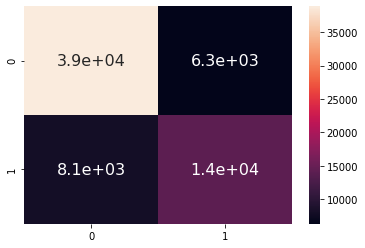

In [102]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

matrix_confusion= metrics.confusion_matrix(labels_test,predicciones_test)
matrix_confusion
sn.heatmap(matrix_confusion, annot=True, annot_kws={"size": 16})

plt.show()

In [103]:
print(classification_report(labels_test, predicciones_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     45209
           1       0.69      0.64      0.66     22293

    accuracy                           0.79     67502
   macro avg       0.76      0.75      0.75     67502
weighted avg       0.78      0.79      0.78     67502



Tras calcular la matriz de confusión podemos obtener información a través de diversas métricas como el precision, recall y F1-Score.

La precision del modelo para la calse positiva es de 69%. Esta métrica hace referencia a la habilidad del clasificador para no predecir los proyectos no exitosos como exitosos.

El recall presenta un valor de 64%, esta métrica muestra la habilidad del clasificador para predecir bien todos los proyectos exitosos reales. 


Convertimos la matriz de confusión en un dataframe

In [104]:
confussion_matrix_df = pd.DataFrame(matrix_confusion,
                                   index=['true:succesful', 'true:not succesful'],
                                   columns=['pred:succesful', 'pred:not succesful'])
confussion_matrix_df

,pred:succesful,pred:not succesful
true:succesful,38867,6342
true:not succesful,8096,14197


Tras calcular la matriz de confusión vemos que el modelo ha predicho correctamente 38867 proyectos que pertenecían a la clase positiva( succesful) y 14197 que pertenecían a la clase negativa ( not succesful). 
El modelo ha predicho erroneamente 6342 observaciones que ha clasficado como proyecto no exitoso cuando en realidad estos eran exitosos y ha predicho erróneamente 8096	 observaciones como exitoso cuando estos eran no exitosos. 

# ROC-Curve del modelo

Visualizamos el rendimiento de nuestro modelo. 

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
# Calculamos la roc curve
fpr, tpr, thresholds = roc_curve(labels_test, predicciones_test)

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(labels_test, predicciones_test)

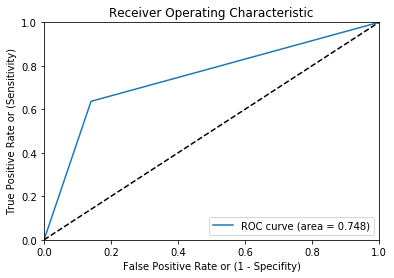

In [108]:
# Gráfico de la ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Observamos como la curva ROC se despega rápido del random guess, lo cual es una buena señal del poder de predicción de nuestro modelo, ya que es capaz de descriminar los casos positivos de los negativos. 
